In [1]:
import sys
sys.path.append("../../src/")

import uncertainpy.gradual as grad  

# Stock example

In [2]:
# Define your model
model = grad.semantics.QuadraticEnergyModel()
# Set an approximator
model.approximator = grad.algorithms.RK4(model)
# Set the BAG
model.BAG = grad.BAG("../../bags/stock_example.bag")

model.solve(delta=10e-2, epsilon=10e-4, verbose=True, generate_plot=False)


QuadraticEnergyModel, RK4
Time: 8.399999999999986
Argument(name=Buy, weight=0.5, strength=0.8208178793031596)
Argument(name=Sell, weight=0.5, strength=0.36345378093100583)
Argument(name=1, weight=0.8, strength=0.20494963930535626)
Argument(name=2, weight=0.7, strength=0.8050136080030856)
Argument(name=3, weight=0.3, strength=0.165776045953347)
Argument(name=4, weight=0.9, strength=0.9)
Argument(name=5, weight=0.9, strength=0.9)



0.0009849389836143567

# Acyclic BAGs

For acyclic BAGs, strength values can be computed more efficiently using methods from the Acyclic module

In [3]:
# Iterative computation
model = grad.semantics.ContinuousModularModel(grad.semantics.modular.ProductAggregation(), 
                                              grad.semantics.modular.LinearInfluence(conservativeness=1))
model.BAG = grad.BAG("../../bags/RagoEtAlEDemocracy.bag")
model.approximator = grad.algorithms.RK4(model)

model.solve(delta=10e-2, epsilon=10e-4, verbose=False, generate_plot=False)

for arg in model.BAG.arguments.values():
    print((arg.name,arg.strength))

('A1', 0.8620500122573919)
('A2', 0.84921499196052)
('P1', 0.7)
('P2', 0.08094200964737629)
('P3', 0.9)
('C1', 0.2)
('C2', 0.2)
('C3', 0.6)
('C4', 0.5)


In [4]:
# Computation via Forward Propagation
bag = grad.BAG("../../bags/RagoEtAlEDemocracy.bag")

agg_f = grad.semantics.modular.ProductAggregation()
inf_f = grad.semantics.modular.LinearInfluence(conservativeness=1)

#returns dictionary of strength values if needed
strength_values = grad.algorithms.computeStrengthValues(bag, agg_f, inf_f)

for arg in bag.arguments.values():
    print((arg.name,arg.strength))

('A1', 0.862)
('A2', 0.8500000000000001)
('P1', 0.7)
('P2', 0.08000000000000002)
('P3', 0.9)
('C1', 0.2)
('C2', 0.2)
('C3', 0.6)
('C4', 0.5)


In [8]:
# if BAG contains cycles, algorithm is not applicable
bag = grad.BAG("../../bags/stock_example.bag")

agg_f = grad.semantics.modular.ProductAggregation()
inf_f = grad.semantics.modular.LinearInfluence(conservativeness=1)

#returns dictionary of strength values if needed
strength_values = grad.algorithms.computeStrengthValues(bag, agg_f, inf_f)
print(strength_values)

Graph contains cycles. Found partial topological order ['4', '5', '3', '2', '1'].
None


# Stock example (with graph)

<module 'matplotlib.pyplot' from 'C:\\Users\\nicop\\anaconda3\\envs\\Explainable ML\\lib\\site-packages\\matplotlib\\pyplot.py'>

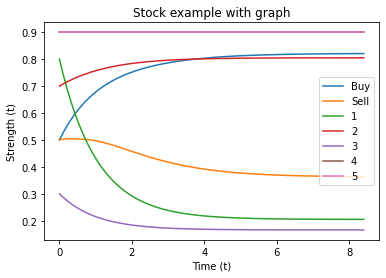

In [5]:
#from uncertainpy.argumentation.graphing import graph

model = grad.semantics.QuadraticEnergyModel()
model.approximator = grad.algorithms.RK4(model)
model.BAG = grad.BAG("../../bags/stock_example.bag")

DELTA = 10e-2
EPSILON = 10e-4

model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
grad.plotting.strengthplot(model, DELTA, EPSILON, "Stock example with graph")

# Stock example comparison

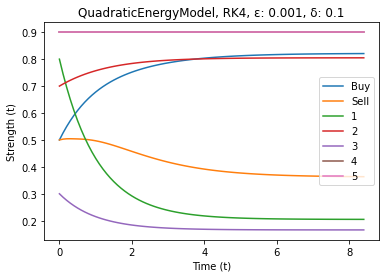

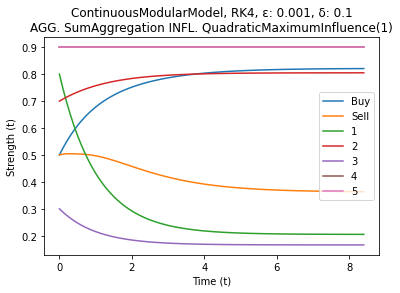

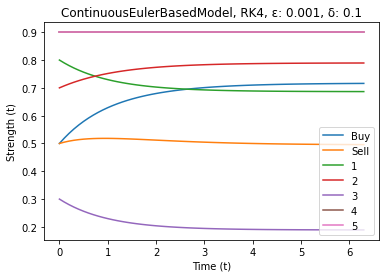

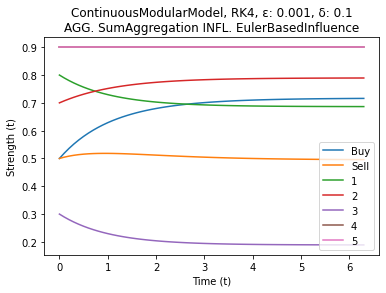

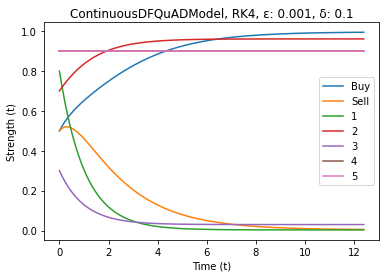

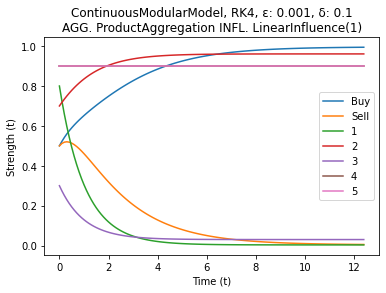

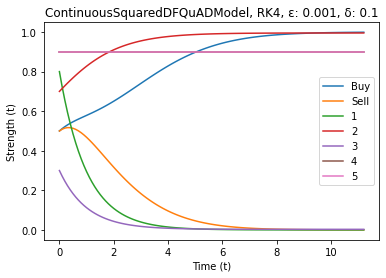

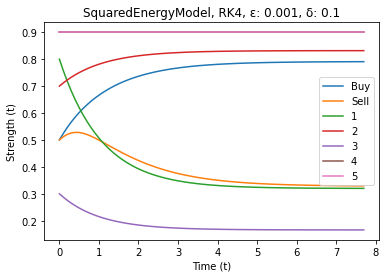

In [6]:
DELTA = 10e-2
EPSILON = 10e-4

models = []
plots = []

models.append(grad.semantics.QuadraticEnergyModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.SumAggregation(), grad.semantics.modular.QuadraticMaximumInfluence(conservativeness=1)))
models.append(grad.semantics.ContinuousEulerBasedModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.SumAggregation(), grad.semantics.modular.EulerBasedInfluence()))
models.append(grad.semantics.ContinuousDFQuADModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.ProductAggregation(), grad.semantics.modular.LinearInfluence(conservativeness=1)))
models.append(grad.semantics.ContinuousSquaredDFQuADModel())
models.append(grad.semantics.SquaredEnergyModel())

for model in models:
    BAG = grad.BAG("../../bags/stock_example.bag")
    BAG.reset_strength_values()
    model.approximator = grad.algorithms.RK4(model)
    model.BAG = BAG

    result = model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
    title = f"{model.name}, {model.approximator}, ε: {EPSILON}, δ: {DELTA}"
    if model.aggregation is not None:
        title += f"\nAGG. {model.aggregation}"
    if model.influence is not None:
        title += f" INFL. {model.influence}"

    plots.append(grad.plotting.strengthplot(model, DELTA, EPSILON, title))

for plot in plots:
    plot.show()


# Cycles 

QuadraticEnergyModel, RK4
Time: 58.50000000000056
Argument(name=A, weight=1, strength=0.13207533031881255)
Argument(name=B0, weight=0, strength=0.01650111554282822)
Argument(name=C0, weight=0, strength=0.025578304880260305)
Argument(name=C1, weight=0, strength=0.025578304880260305)
Argument(name=C2, weight=0, strength=0.025578304880260305)
Argument(name=C3, weight=0, strength=0.025578304880260305)
Argument(name=C4, weight=0, strength=0.025578304880260305)
Argument(name=C5, weight=0, strength=0.025578304880260305)
Argument(name=C6, weight=0, strength=0.025578304880260305)
Argument(name=C7, weight=0, strength=0.025578304880260305)
Argument(name=C8, weight=0, strength=0.025578304880260305)
Argument(name=C9, weight=0, strength=0.025578304880260305)
Argument(name=B1, weight=0, strength=0.01650111554282822)
Argument(name=B2, weight=0, strength=0.01650111554282822)
Argument(name=B3, weight=0, strength=0.01650111554282822)
Argument(name=B4, weight=0, strength=0.01650111554282822)
Argument(name

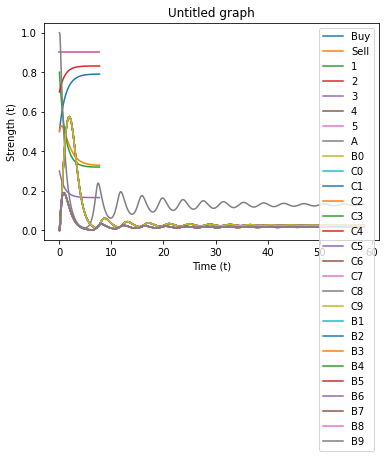

In [7]:
DELTA = 10e-2
EPSILON = 10e-4
N = 10

model = grad.semantics.QuadraticEnergyModel()
BAG = grad.BAG()

a = grad.Argument("A", 1)
b = []
for i in range(N):
    b.append(grad.Argument(f"B{i}", 0))

c = []
for i in range(N):
    c.append(grad.Argument(f"C{i}", 0))

for i in range(N):
    BAG.add_support(a, b[i])
    for j in range(N):
        BAG.add_support(b[i], c[j])
        BAG.add_attack(c[j], a)

model.approximator = grad.algorithms.RK4(model)
model.BAG = BAG
result = model.solve(DELTA, EPSILON, True, True)

plot = grad.plotting.strengthplot(model, DELTA, EPSILON)
plot.show()